# CHEOPS secondary eclipse modelling
## Case c: Free EV amplitude 

**Author:** Hannu Parviainen<br>
**Last edited:** 26.5.2022

Here we model the *CHEOPS* data with an uninformative prior on the EV amplitude, otherwise everything is like in the 2a notebook.

In [1]:
%run src/init_threading_for_multiprocessing.py

In [2]:
%pylab inline
rc('figure', figsize=(13,4))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from multiprocessing import Pool
from src import CHEOPSLPF

In [4]:
lpf = CHEOPSLPF('c')

In [5]:
def lnposterior(pv):
    return squeeze(lpf.lnposterior(pv))

pool = Pool(processes=16)

In [ ]:
lpf.ps

## Find the global posterior mode

Global optimisation:   0%|          | 0/150 [00:00<?, ?it/s]

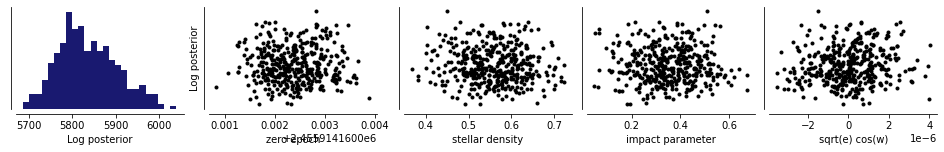

In [7]:
lpf.optimize_global(150, npop=400, pool=pool, vectorize=False, lnpost=lnposterior)

Global optimisation:   0%|          | 0/15000 [00:00<?, ?it/s]

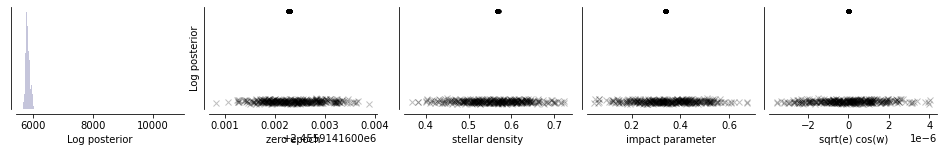

In [8]:
lpf.optimize_global(15000, npop=400, pool=pool, vectorize=False, lnpost=lnposterior)

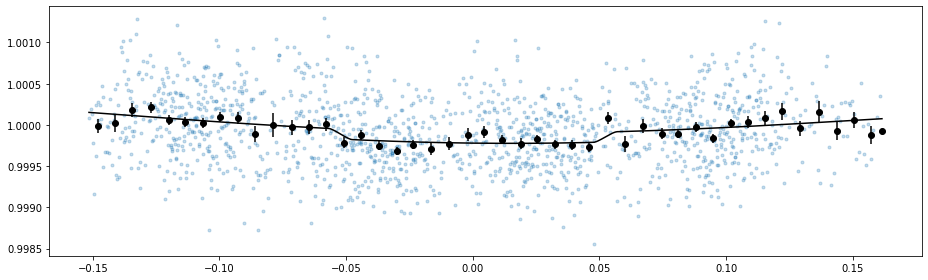

In [9]:
lpf.plot_folded_light_curve();

## Sample the posterior using MCMC

In [ ]:
lpf.sample_mcmc(5000, 100, repeats=10, save=True, pool=pool, vectorize=False, lnpost=lnposterior)

In [11]:
df = lpf.posterior_samples()

<AxesSubplot:>

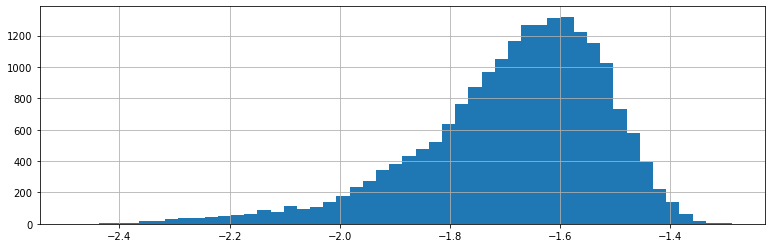

In [13]:
df.log10_ted_cheops.hist(bins=50)

<AxesSubplot:>

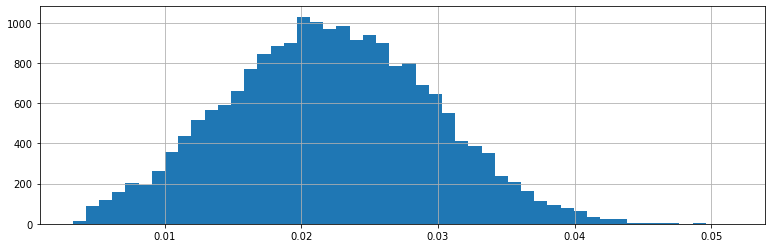

In [14]:
(10**df.log10_ted_cheops).hist(bins=50)

---

<center>&copy;2022 Hannu Parviainen</center>